<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/Random_Forest_on_Medical_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest on Medical Dataset**

****Importing libraries****

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [ ]:
#uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Dataset**

In [ ]:
dataset=pd.read_csv('/preprocessed medical data 2 - Copy.csv')

**Exploratory Data Analysis**

In [ ]:
dataset.head()

,mrn,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,diabetesMed,label
0,779,1.0,1,1,1,1,7,1,5,36.00,...,0,0,0,0,0,0,0,0,0,1
1,601,1.0,1,1,1,1,7,2,5,38.79,...,0,0,0,0,0,0,0,0,0,1
2,237,1.0,2,1,1,1,7,1,5,38.00,...,0,0,0,0,0,0,0,2,1,1
3,589,1.0,2,1,1,1,7,2,5,36.00,...,0,0,0,0,0,0,0,2,1,1
4,436,1.0,2,1,6,25,7,2,5,47.00,...,0,0,0,0,0,0,0,2,1,1


In [ ]:
print(dataset.shape)

(101763, 37)


In [ ]:
print(list(dataset.columns))

['mrn', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'diabetesMed', 'label']


In [ ]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [ ]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['mrn',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'diabetesMed']

**Split Dataset**

In [ ]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [ ]:
X.head()

,mrn,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,diabetesMed
0,779,1.0,1,1,1,1,7,1,5,36.00,...,0,0,0,0,0,0,0,0,0,0
1,601,1.0,1,1,1,1,7,2,5,38.79,...,0,0,0,0,0,0,0,0,0,0
2,237,1.0,2,1,1,1,7,1,5,38.00,...,0,0,0,0,0,0,0,0,2,1
3,589,1.0,2,1,1,1,7,2,5,36.00,...,0,0,0,0,0,0,0,0,2,1
4,436,1.0,2,1,6,25,7,2,5,47.00,...,0,0,0,0,0,0,0,0,2,1


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Splitting Data**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (71234, 36)
X_test shape  is :  (30529, 36)
y_train shape is :  (71234,)
y_test shape is  :  (30529,)


**Building Decision Tree Model**

In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start
#print(train_time)

4.36420711799974


In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    2   133     0     0  3936]
 [   10   237     2     0  7552]
 [    3    85     0     0  2330]
 [    1    30     0     0   807]
 [   14   521     4     0 14862]]
              precision    recall  f1-score   support

           1       0.07      0.00      0.00      4071
           2       0.24      0.03      0.05      7801
           4       0.00      0.00      0.00      2418
           8       0.00      0.00      0.00       838
          16       0.50      0.97      0.66     15401

    accuracy                           0.49     30529
   macro avg       0.16      0.20      0.14     30529
weighted avg       0.32      0.49      0.35     30529



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
#print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.4946444364374857
Mean Absolute Error: 6.788594451177569
Cohens kappa: -0.0023308954207894583
Train Time(s):  14.663430983000012
Test Time(s):  1.2570398810000825


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ValueError: ignored

In [ ]:
plot_roc_curve(fpr, tpr)

NameError: ignored

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-RF_Result.csv')

**Finding Important Features in Scikit-learn**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

mrn                         0.127769
num_lab_procedures          0.109285
num_medications             0.097854
time_in_hospital            0.068331
age                         0.059224
medical_specialty           0.048674
number_diagnoses            0.047795
num_procedures              0.046428
discharge_disposition_id    0.039915
payer_code                  0.037442
number_inpatient            0.036492
insulin                     0.035040
number_outpatient           0.023180
race                        0.023005
gender                      0.022337
admission_type_id           0.021953
admission_source_id         0.020963
A1Cresult                   0.020025
metformin                   0.019077
number_emergency            0.015734
glipizide                   0.015046
diabetesMed                 0.013268
glyburide                   0.013041
pioglitazone                0.009605
rosiglitazone               0.008941
glimepiride                 0.007838
max_glu_serum               0.005264
r

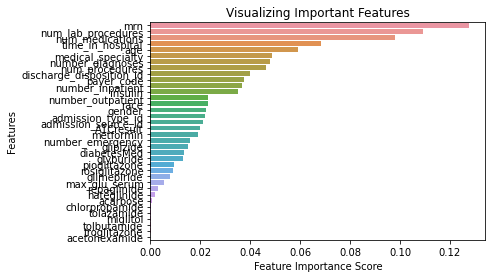

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.savefig('f7.pdf')
plt.show()


**Generating the Model on Selected Features**

In [ ]:
# Split dataset into features and labels
X = dataset.drop(['label','mrn','num_lab_procedures', 'miglitol', 'tolazamide', 'nateglinide', 'diabetesMed', 'glyburide', 'glipizide', 'number_emergency'], axis=1) # New Features
y=dataset['label']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [ ]:
print(X.shape)

(101763, 27)


In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   81   706    24     7  8736]
 [  133  1268    30     6 16934]
 [   50   380     4     0  5141]
 [   21   139     4     2  1781]
 [  245  2512    71    28 32932]]
              precision    recall  f1-score   support

           1       0.15      0.01      0.02      9554
           2       0.25      0.07      0.11     18371
           4       0.03      0.00      0.00      5575
           8       0.05      0.00      0.00      1947
          16       0.50      0.92      0.65     35788

    accuracy                           0.48     71235
   macro avg       0.20      0.20      0.16     71235
weighted avg       0.34      0.48      0.36     71235



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.48132238365971786


ValueError: ignored

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4809854706253948


In [ ]:
#@title One-Hot Encoding



In [ ]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


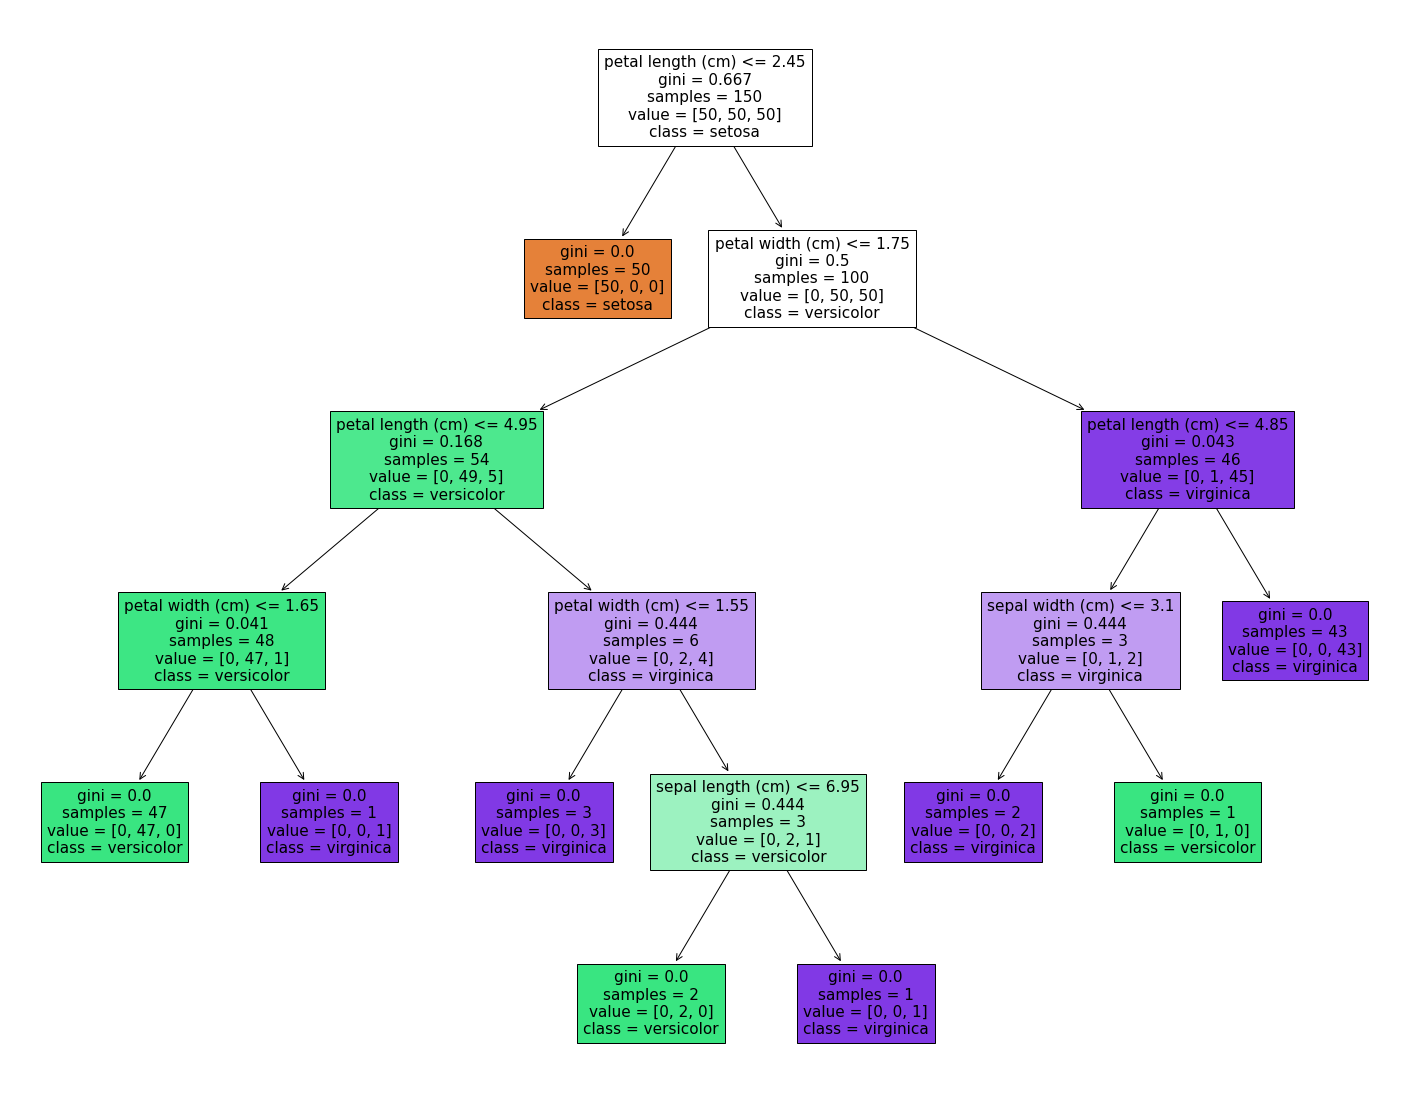

In [8]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

# text_representation = tree.export_text(clf)
# print(text_representation)

# with open("decistion_tree.log", "w") as fout:
#     fout.write(text_representation)

#Plot Tree with plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
fig.savefig("decistion_tree.png")
